<h1>Assignment 1<h1>

<h3>Apurva Anand, A04285700<h3>

I start off by importing all the libraries I'll be using for the Assignment.

In [33]:
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Here I read my NetCDF file using xarray library, and store it in respective variables.<br>
prateWorldDs => Worldwide monthly mean precipitation rate data. (Kg/m^2/s) <br>
airWorldDs   => Worldwide monthly mean temprature data. (degK)<br>
wspdWorldDs  => Worldwide monthly mean wind speed data. (m/s)<br>
rhumWorldDs  => Worldwide monthly mean relative humidity data. (%)<br>

In [5]:
prateWorldDs = xr.open_dataset('prate.sfc.mon.mean.nc')
airWorldDs = xr.open_dataset('air.2m.mon.mean.nc')
wspdWorldDs = xr.open_dataset('wspd.sig995.mon.mean.nc')
rhumWorldDs = xr.open_dataset('rhum.sig995.mon.mean.nc')

I now explore our dataset, understanding it's dimensions, coordinates and attributes.

In [6]:
prateWorldDs

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 896)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-08-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [7]:
airWorldDs

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 896)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-08-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [8]:
wspdWorldDs

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 896)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-08-01
Data variables:
    wspd     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:50 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean wspd.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [9]:
rhumWorldDs

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 896)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2022-08-01
Data variables:
    rhum     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:20 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean rhum.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

<h3>Data Extraction<h3>

I extract our required data from the worldwide dataset.<br>
I start off by extracting data around New Delhi.<br>
I use the .sel() function to select the latitude, longitude and time period (30 YEARS).<br>
prateDelDa => Monthly mean precipitation rate data in New Delhi. (Kg/m^2/s) <br>
airDelDa   => Monthly mean temprature data in New Delhi. (degK)<br>
wspdDelDa  => Monthly mean wind speed data in New Delhi. (m/s)<br>
rhumDelDa  => Monthly mean relative humidity data in New Delhi. (%)<br>

In [10]:
prateDelDa = prateWorldDs.sel(lon = [76.875], lat = [27.6186], time = slice("1992-08-01", "2022-08-01"), method = None)
airDelDa = airWorldDs.sel(lon = [76.875], lat = [27.6186], time = slice("1992-08-01", "2022-08-01"), method = None)
wspdDelDa = wspdWorldDs.sel(lon = [77.5], lat = [27.5], time = slice("1992-08-01", "2022-08-01"), method = None)
rhumDelDa = rhumWorldDs.sel(lon = [77.5], lat = [27.5], time = slice("1992-08-01", "2022-08-01"), method = None)

I explore and go through the data

In [11]:
prateDelDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.62
  * lon      (lon) float32 76.88
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [12]:
airDelDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.62
  * lon      (lon) float32 76.88
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [13]:
wspdDelDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.5
  * lon      (lon) float32 77.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    wspd     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:50 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean wspd.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [14]:
rhumDelDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.5
  * lon      (lon) float32 77.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    rhum     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:20 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean rhum.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

I'll be repeating the process shown above for the city of Corpus Christi <br>
prateCrpDa => Monthly mean precipitation rate data in Corpus Christi. (Kg/m^2/s) <br>
airCrpDa   => Monthly mean temprature data in Corpus Christi. (degK)<br>
wspdCrpDa  => Monthly mean wind speed data in Corpus Christi. (m/s)<br>
rhumCrpDa  => Monthly mean relative humidity data in Corpus Christi. (%)<br>

In [15]:
prateCrpDa = prateWorldDs.sel(lon=[262.5], lat=[27.6186], time=slice("1992-08-01", "2022-08-01"), method=None)
airCrpDa = airWorldDs.sel(lon=[262.5], lat=[27.6186], time=slice("1992-08-01", "2022-08-01"), method=None)
wspdCrpDa = wspdWorldDs.sel(lon=[262.5], lat=[27.5], time=slice("1992-08-01", "2022-08-01"), method=None)
rhumCrpDa = rhumWorldDs.sel(lon=[262.5], lat=[27.5], time=slice("1992-08-01", "2022-08-01"), method=None)

I explore and go through the data

In [16]:
prateCrpDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.62
  * lon      (lon) float32 262.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [17]:
airCrpDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.62
  * lon      (lon) float32 262.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [18]:
wspdCrpDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.5
  * lon      (lon) float32 262.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    wspd     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:50 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean wspd.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [19]:
rhumCrpDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 27.5
  * lon      (lon) float32 262.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    rhum     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:20 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean rhum.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

I repeat the process for the city of San Francisco<br>
prateSfDa => Monthly mean precipitation rate data in San Francisco. (Kg/m^2/s) <br>
airSfDa   => Monthly mean temprature data in San Francisco. (degK)<br>
wspdSfDa  => Monthly mean wind speed data in San Francisco. (m/s)<br>
rhumSfDa  => Monthly mean relative humidity data in San Francisco. (%)<br>

In [20]:
prateSfDa = prateWorldDs.sel(lon=[238.125], lat=[37.1422], time=slice("1992-08-01", "2022-08-01"), method=None)
airSfDa = airWorldDs.sel(lon=[238.125], lat=[37.1422], time=slice("1992-08-01", "2022-08-01"), method=None)
wspdSfDa = wspdWorldDs.sel(lon=[237.5], lat=[37.5], time=slice("1992-08-01", "2022-08-01"), method=None)
rhumSfDa = rhumWorldDs.sel(lon=[237.5], lat=[37.5], time=slice("1992-08-01", "2022-08-01"), method=None)

I explore and go through the data

In [21]:
prateSfDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 37.14
  * lon      (lon) float32 238.1
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [22]:
airSfDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 37.14
  * lon      (lon) float32 238.1
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [23]:
wspdSfDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 37.5
  * lon      (lon) float32 237.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    wspd     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:50 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean wspd.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [24]:
rhumSfDa

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 361)
Coordinates:
  * lat      (lat) float32 37.5
  * lon      (lon) float32 237.5
  * time     (time) datetime64[ns] 1992-08-01 1992-09-01 ... 2022-08-01
Data variables:
    rhum     (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:20 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean rhum.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

I realise that my Data arrays are a 3 dimensional DataArray.<br>
Firstly I extracted the 'time' values from a random Data Array as I had selected the same time period and intervals for all my data (30 years and at monthly intervals).<br> 
To make 2 dimensional array I use the .stack() function in the numpy library to stack my 'time', 'lat' & 'lon' variables into a single axis called 'z'.<br>
prateDel  => 2D array of 'prateDelDa'<br>
airDel    => 2D array of 'airDelDa'<br>
wspdDel   => 2D array of 'wspdDelDa'<br>
rhumDel   => 2D array of 'rhumDelDa'<br>

In [25]:
Time=np.array(wspdDelDa.time.values)

prateDel = prateDelDa.prate.stack(z=['time', 'lat', 'lon'])
airDel = airDelDa.air.stack(z=['time', 'lat', 'lon'])
wspdDel = wspdDelDa.wspd.stack(z=['time', 'lat', 'lon'])
rhumDel = rhumDelDa.rhum.stack(z=['time', 'lat', 'lon'])

Making 2D arrays for Data Arrays of the data from Corpus Christi <br>
prateCrp  => 2D array of 'prateCrpDa'<br>
airCrp    => 2D array of 'airCrpDa'<br>
wspdCrp   => 2D array of 'wspdCrpDa'<br>
rhumCrp   => 2D array of 'rhumCrpDa'<br>

In [26]:
prateCrp = prateCrpDa.prate.stack(z=['time', 'lat', 'lon'])
airCrp = airCrpDa.air.stack(z=['time', 'lat', 'lon'])
wspdCrp = wspdCrpDa.wspd.stack(z=['time', 'lat', 'lon'])
rhumCrp = rhumCrpDa.rhum.stack(z=['time', 'lat', 'lon'])

Making 2D arrays for Data Arrays of the data from San Francisco <br>
prateSf  => 2D array of 'prateSfDa'<br>
airSf    => 2D array of 'airSfDa'<br>
wspdSf   => 2D array of 'wspdSfDa'<br>
rhumSf   => 2D array of 'rhumSfDa'<br>

In [27]:
prateSf = prateSfDa.prate.stack(z=['time', 'lat', 'lon'])
airSf = airSfDa.air.stack(z=['time', 'lat', 'lon'])
wspdSf = wspdSfDa.wspd.stack(z=['time', 'lat', 'lon'])
rhumSf = rhumSfDa.rhum.stack(z=['time', 'lat', 'lon'])

Creating 1st figure with 6 plots in a 3x2 grid with 60 dpi.<br>
First column is Temprature.<br>
Second column is Precipitation. <br>
First row is data from New Dehli.<br>
Second row is data from Corpus Christi.<br>
Third row is data from San Francisco.

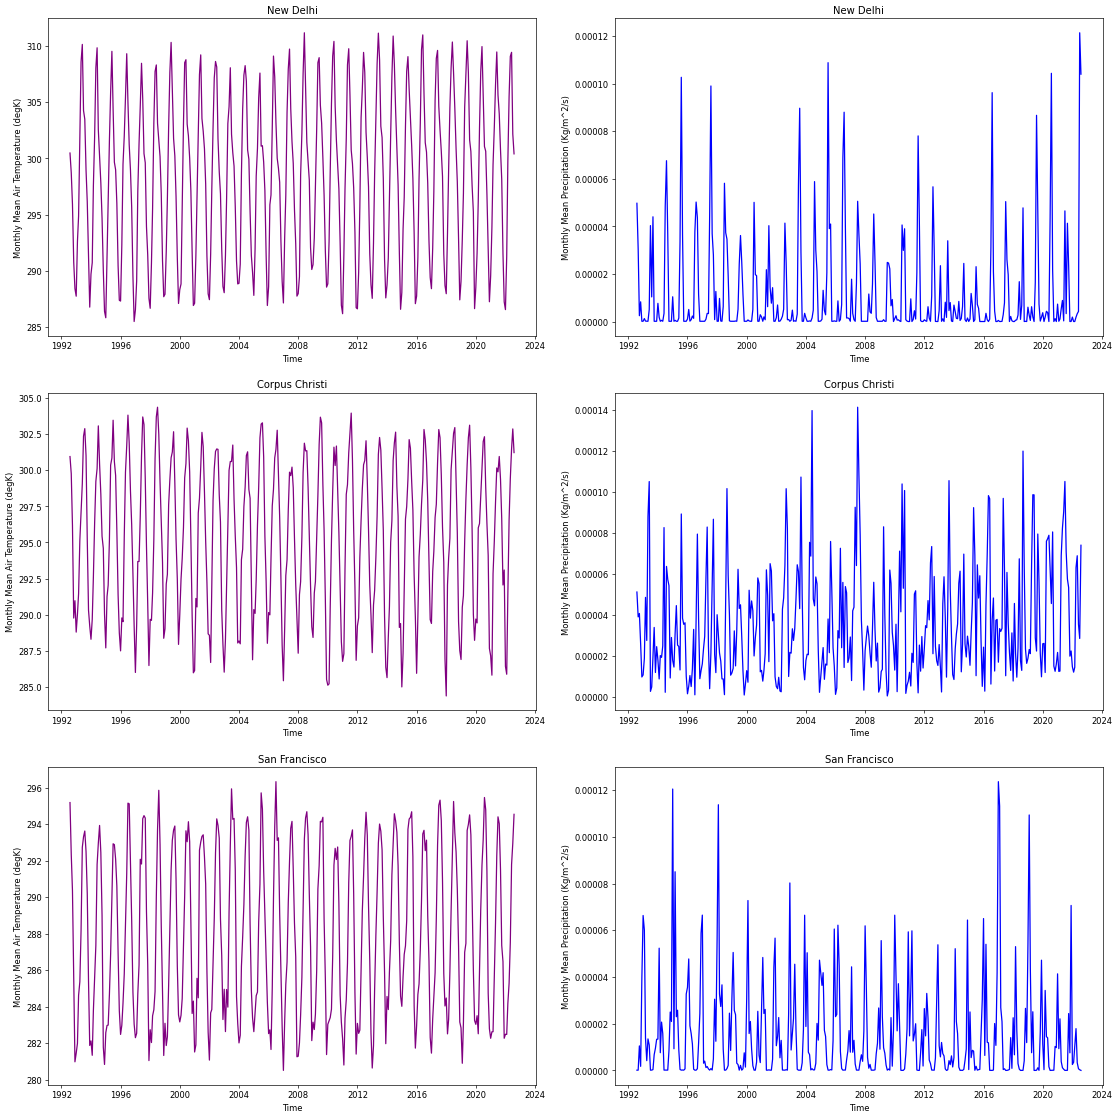

In [28]:
fig_1, ax=plt.subplots(nrows=3, ncols=2, figsize=(19,19))
ax[0,0].plot(Time, airDel, color='purple')
ax[0,0].set(ylabel="Monthly Mean Air Temperature (degK)", xlabel="Time", title="New Delhi")
ax[0,1].plot(Time, prateDel, color='blue')
ax[0,1].set(ylabel="Monthly Mean Precipitation (Kg/m^2/s)", xlabel="Time", title="New Delhi")

ax[1,0].plot(Time, airCrp, color='purple')
ax[1,0].set(ylabel="Monthly Mean Air Temperature (degK)", xlabel="Time", title="Corpus Christi")
ax[1,1].plot(Time, prateCrp, color='blue')
ax[1,1].set(ylabel="Monthly Mean Precipitation (Kg/m^2/s)", xlabel="Time", title="Corpus Christi")

ax[2,0].plot(Time, airSf, color='purple')
ax[2,0].set(ylabel="Monthly Mean Air Temperature (degK)", xlabel="Time", title="San Francisco")
ax[2,1].plot(Time, prateSf, color='blue')
ax[2,1].set(ylabel="Monthly Mean Precipitation (Kg/m^2/s)", xlabel="Time", title="San Francisco")

#fig_1.set_size_inches(6,4)
fig_1.set_dpi(60)
fig_1.tight_layout(pad=2.0)

Creating 2nd figure with 6 plots in a 3x2 grid.<br>
First column is Relative Humidity.<br>
Second column is Wind Speed. <br>
First row is data from New Dehli.<br>
Second row is data from Corpus Christi.<br>
Third row is data from San Francisco.

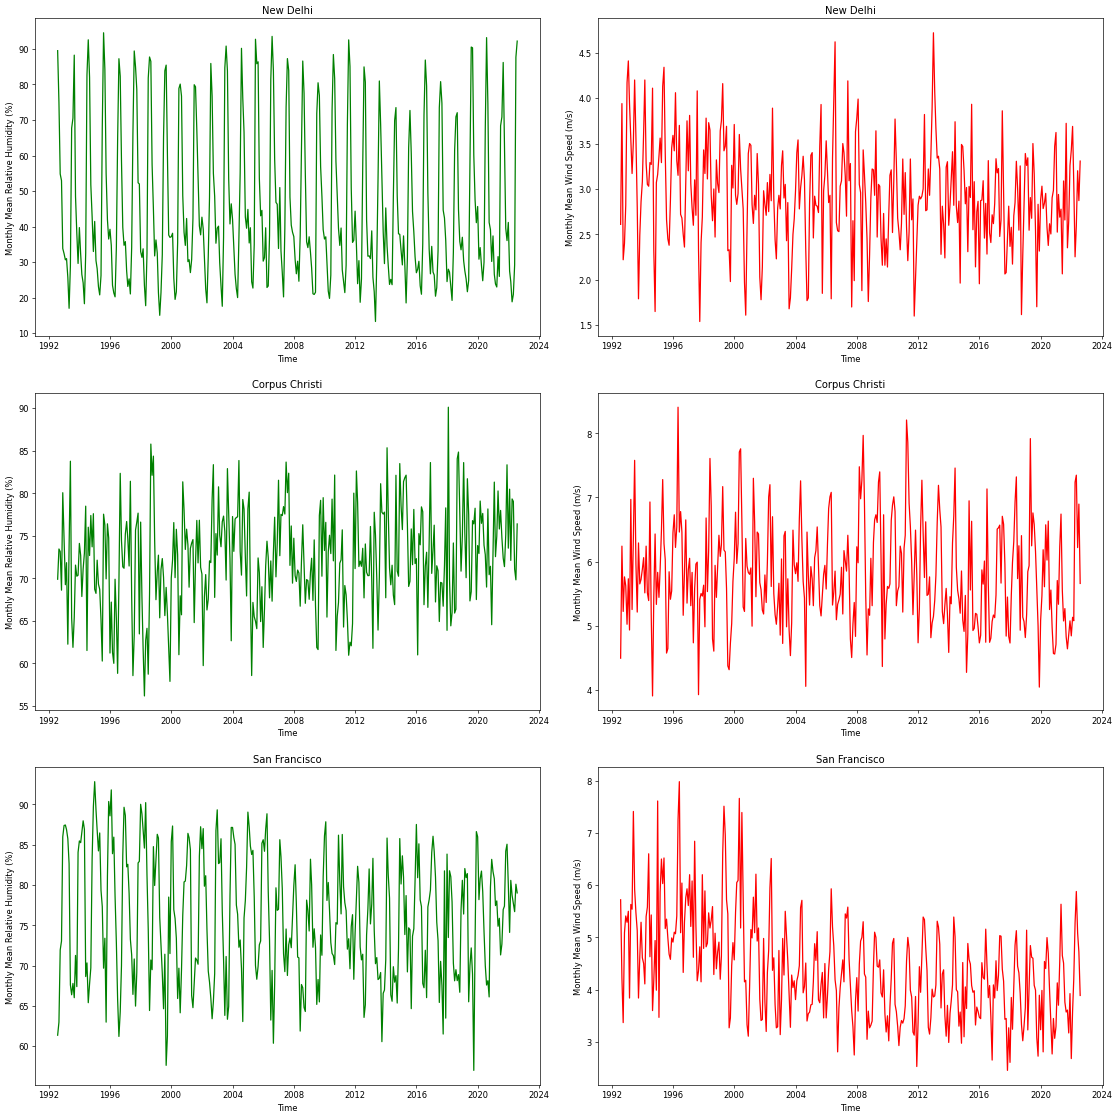

In [29]:
fig_2, ax2=plt.subplots(nrows=3, ncols=2, figsize=(19,19))
ax2[0,0].plot(Time, rhumDel, color='green')
ax2[0,0].set(ylabel="Monthly Mean Relative Humidity (%)", xlabel="Time", title="New Delhi")
ax2[0,1].plot(Time, wspdDel, color='red')
ax2[0,1].set(ylabel="Monthly Mean Wind Speed (m/s)", xlabel="Time", title="New Delhi")

ax2[1,0].plot(Time, rhumCrp, color='green')
ax2[1,0].set(ylabel="Monthly Mean Relative Humidity (%)", xlabel="Time", title="Corpus Christi")
ax2[1,1].plot(Time, wspdCrp, color='red')
ax2[1,1].set(ylabel="Monthly Mean Wind Speed (m/s)", xlabel="Time", title="Corpus Christi")

ax2[2,0].plot(Time, rhumSf, color='green')
ax2[2,0].set(ylabel="Monthly Mean Relative Humidity (%)", xlabel="Time", title="San Francisco")
ax2[2,1].plot(Time, wspdSf, color='red')
ax2[2,1].set(ylabel="Monthly Mean Wind Speed (m/s)", xlabel="Time", title="San Francisco")

fig_2.set_dpi(60)
fig_2.tight_layout(pad=2.0)

Creating a plot to analyse trends in temprature at all three locations.

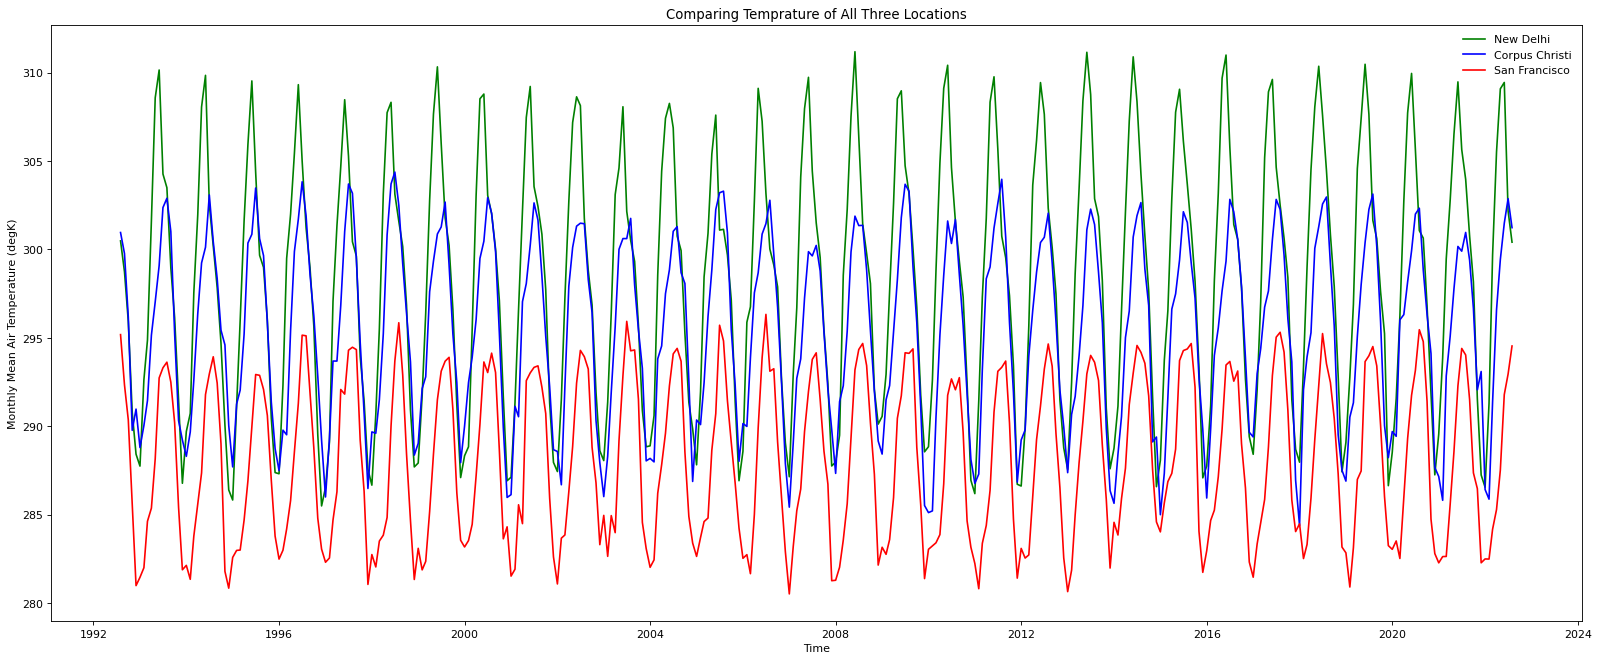

In [30]:
fig_3, ax3=plt.subplots(nrows=1, ncols=1, figsize=(25,10))
ax3.plot(Time, airDel, color='green', label = 'New Delhi')
ax3.plot(Time, airCrp, color='blue', label = 'Corpus Christi')
ax3.plot(Time, airSf, color='red', label = 'San Francisco')
ax3.set(ylabel="Monthly Mean Air Temperature (degK)", xlabel="Time", title="Comparing Temprature of All Three Locations")
leg3 = ax3.legend(loc='upper right', frameon=False)
fig_3.set_dpi(79)

Creating plot to compare and analyze precipitation rate at all three location.

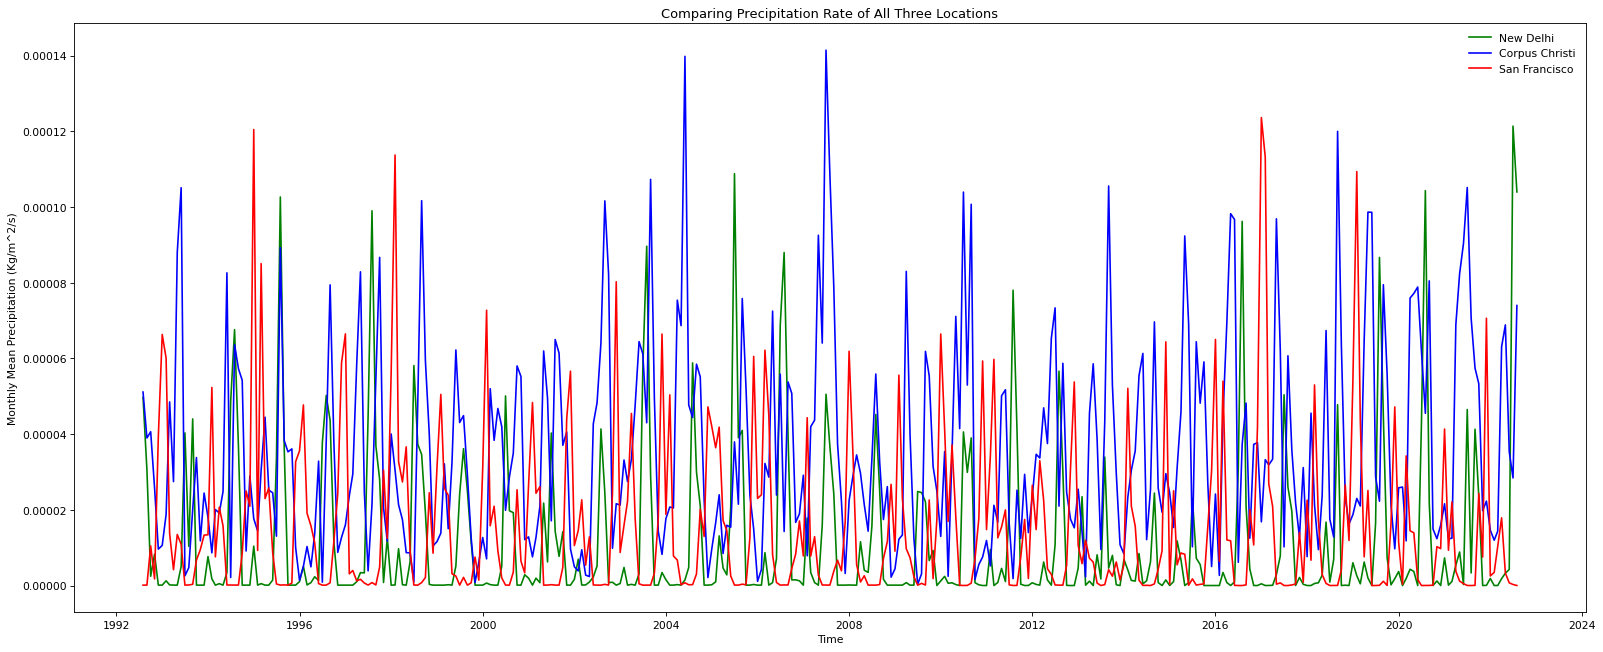

In [31]:
fig_4, ax4=plt.subplots(nrows=1, ncols=1, figsize=(25,10))
ax4.plot(Time, prateDel, color='green', label = 'New Delhi')
ax4.plot(Time, prateCrp, color='blue', label = 'Corpus Christi')
ax4.plot(Time, prateSf, color='red', label = 'San Francisco')
ax4.set(ylabel="Monthly Mean Precipitation (Kg/m^2/s)", xlabel="Time", title="Comparing Precipitation Rate of All Three Locations")
leg4 = ax4.legend(frameon=False)
fig_4.set_dpi(78)

Creating plot to compare and analyze wind speed at all three locations.

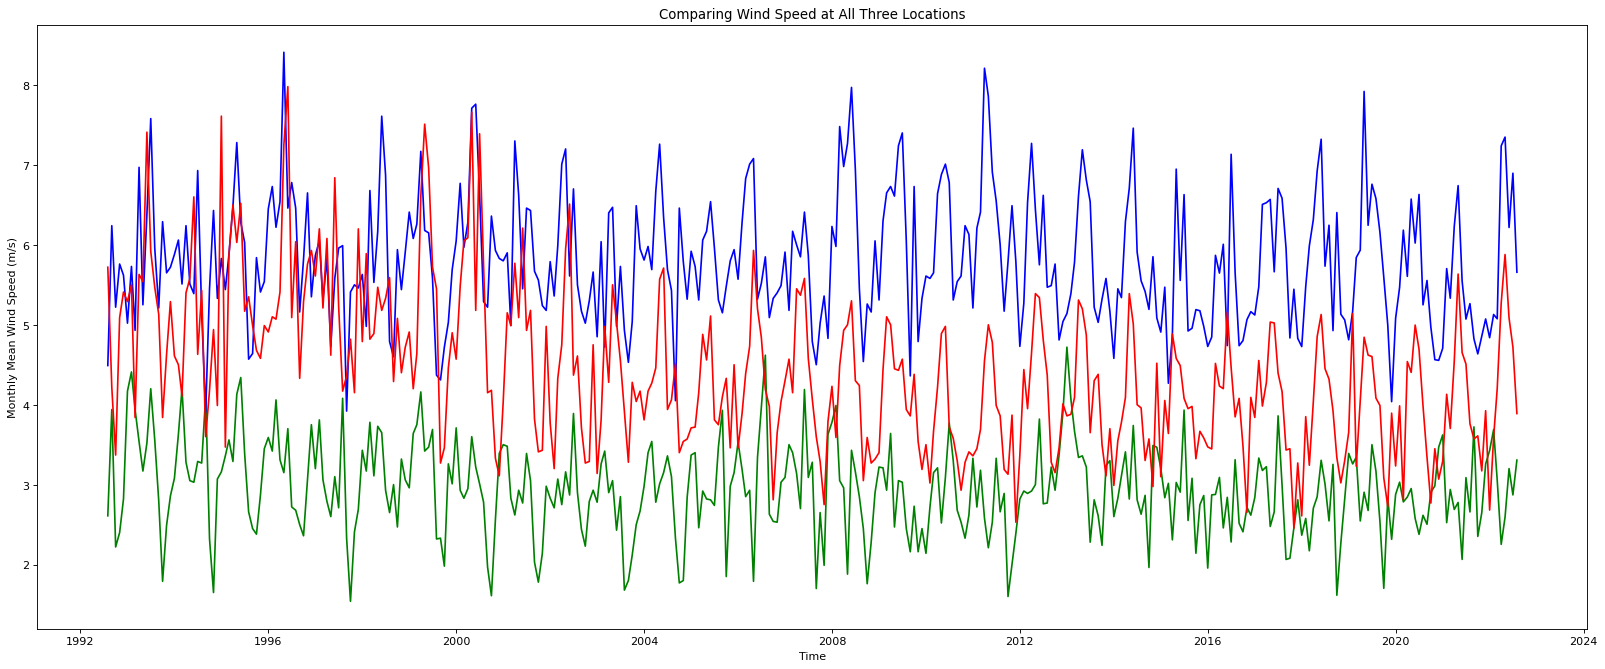

In [32]:
fig_5, ax5=plt.subplots(nrows=1, ncols=1, figsize=(25,10))
ax5.plot(Time, wspdDel, color='green', label = 'New Delhi')
ax5.plot(Time, wspdCrp, color='blue', label = 'Corpus Christi')
ax5.plot(Time, wspdSf, color='red', label = 'San Francisco')
ax5.set(ylabel="Monthly Mean Wind Speed (m/s)", xlabel="Time", title="Comparing Wind Speed at All Three Locations")
leg5 = ax4.legend(frameon=False)
fig_5.set_dpi(80)

Creating plot to compare and analyze relative humidity at all three locations.

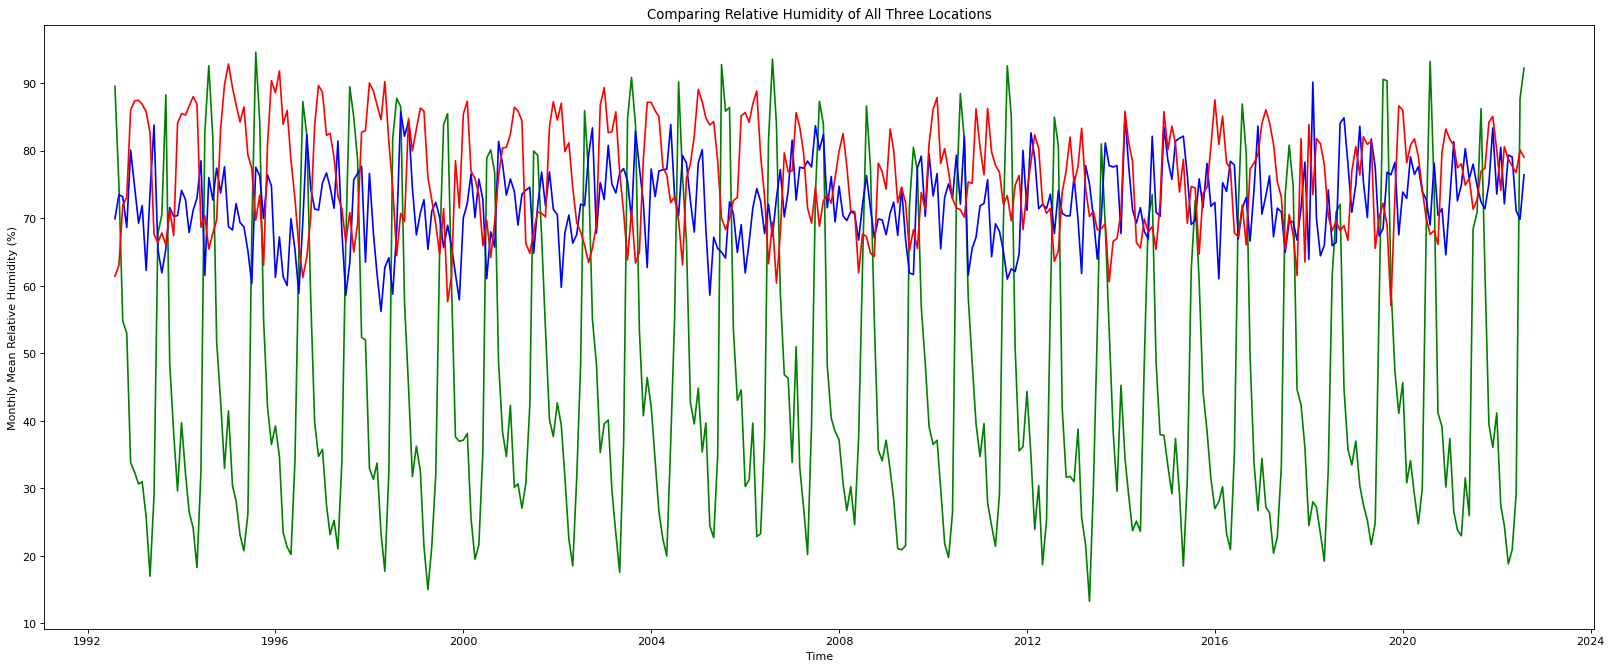

In [35]:
fig_5, ax5=plt.subplots(nrows=1, ncols=1, figsize=(25,10))
ax5.plot(Time, rhumDel, color='green', label = 'New Delhi')
ax5.plot(Time, rhumCrp, color='blue', label = 'Corpus Christi')
ax5.plot(Time, rhumSf, color='red', label = 'San Francisco')
ax5.set(ylabel="Monthly Mean Relative Humidity (%)", xlabel="Time", title="Comparing Relative Humidity of All Three Locations")
leg5 = ax4.legend()
fig_5.set_dpi(80)